# Assignment 03

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import os

torch.__version__

'1.2.0'

In [2]:
transform = transforms.Compose([#transforms.Resize((1,10000)),
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


#train_data_path = 'relative path of training data set'
train_data_path = '..\\Assignment#2\\horse-or-human\\train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# print(trainset)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  


validation_data_path = '..\\Assignment#2\\horse-or-human\\validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  

In [3]:
train_data = np.zeros((10000, 0))
train_label = np.zeros((0,1))
val_data = np.zeros((10000,0))
val_label = np.zeros((0,1))

# load training images of the batch size for every iteration
for i, data in enumerate(trainloader):

    # inputs is the image
    # labels is the class of the image
    inputs, labels = data
    
    # if you don't change the image size, it will be [batch_size, 1, 100, 100]
    train_data = np.hstack((train_data, np.reshape(inputs, (10000,1))))
    
    # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
    train_label = np.append(train_label, labels)

train_label = train_label.reshape(1,1027)


# load validation images of the batch size for every iteration
for i, data in enumerate(valloader):

    # inputs is the image
    # labels is the class of the image
    inputs, labels = data

    # if you don't change the image size, it will be [batch_size, 1, 100, 100]
    val_data = np.hstack((val_data, np.reshape(inputs, (10000,1))))

    # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
    val_label = np.append(val_label, labels)

val_label = val_label.reshape(1,256)


print("train_label shape : " + str(train_label.shape))
print("train_data shape  : " + str(train_data.shape))
print("val_label shape   : " + str(val_label.shape))
print("val_label shape   : " + str(val_data.shape))

train_label shape : (1, 1027)
train_data shape  : (10000, 1027)
val_label shape   : (1, 256)
val_label shape   : (10000, 256)


In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
# INITIALIZE VARIABLES, EPOCH, LEARNING RATE
LEARNING_RATE = 0.01
NUM_EPOCH = 10000
NUM_TRAIN_DATA = train_data.shape[1]
NUM_VAL_DATA = val_data.shape[1]
IMAGE_VECTOR_LEN = train_data.shape[0]

w_1 = np.random.randn(4,10000) * 0.01
w_2 = np.random.randn(3, 4) * 0.01
w_3 = np.random.randn(1, 3) * 0.01

b_1 = 0
b_2 = 0
b_3 = 0

train_loss = np.zeros((2,NUM_EPOCH))
train_accuracy = np.zeros((2,NUM_EPOCH))
val_loss = np.zeros((2,NUM_EPOCH))
val_accuracy = np.zeros((2,NUM_EPOCH))

In [7]:
for i in range(NUM_EPOCH):  
    J = 0   
    dw_1 = np.zeros((4, 10000))
    dw_2 = np.zeros((3, 4))
    dw_3 = np.zeros((1, 3))
    
    db_1 = 0
    db_2 = 0
    db_3 = 0
    
    dz_1 = 0
    dz_2 = 0
    dz_3 = 0
    
    # COMPUTATION OF THE GRADIENT AND UPDATE OF MODEL PARAMETERS
    z_1 = np.dot(w_1, train_data) + b_1
    A_1 = sigmoid(z_1)
#     print(str(A_1.shape))
    
    z_2 = np.dot(w_2, A_1) + b_2
    A_2 = sigmoid(z_2)
#     print(str(A_2.shape))
    
    z_3 = np.dot(w_3, A_2) + b_3
    A_3 = sigmoid(z_3)
#     print(str(A_3.shape))
    
    # COMPUTAION OF DERIVATIVES
    dz_3 = A_3 - train_label
#     print(str(dz_3.shape))
#     print(str(A_2.shape))
    dw_3 = np.dot(dz_3, A_2.T) / NUM_TRAIN_DATA
#     print(str(dw_3.shape))
    db_3 = np.sum(dz_3, axis=1, keepdims=True) / NUM_TRAIN_DATA
#     print(str(db_3.shape))
    
    dz_2 = np.dot(w_3.T, dz_3) *  z_2 * (1- z_2)
#     print(str(w_3.shape))
#     print(str(dz_3.shape))
#     print(str(z_2.shape))
#     print(str(dz_2.shape))
    dw_2 = np.dot(dz_2, A_1.T) / NUM_TRAIN_DATA
#     print(str(dw_2.shape))
    db_2 = np.sum(dz_2, axis=1, keepdims=True) / NUM_TRAIN_DATA
#     print(str(db_2.shape))
    
    dz_1 = np.dot(w_2.T, dz_2) * z_1 * (1- z_1)
#     print(str(w_2.shape))
#     print(str(dz_2.shape))
#     print(str(z_1.shape))
#     print(str(dz_1.shape))
    dw_1 = np.dot(dz_1, train_data.T) / NUM_TRAIN_DATA
    db_1 = np.sum(dz_1, axis=1, keepdims=True) / NUM_TRAIN_DATA
    
    # UPDATE PARAMETERS
    w_1 = w_1 - LEARNING_RATE * dw_1
    w_2 = w_2 - LEARNING_RATE * dw_2
    w_3 = w_3 - LEARNING_RATE * dw_3
    
    b_1 = b_1 - LEARNING_RATE * db_1
    b_2 = b_2 - LEARNING_RATE * db_2
    b_3 = b_3 - LEARNING_RATE * db_3
    
    
    # FOR CALCULATING TRAIN LOSS
    J = (np.dot(train_label, (np.log(A_3)).T) + np.dot(1-train_label, (np.log(1-A_3)).T))
    J = -np.sum(J) / NUM_TRAIN_DATA
    train_loss[0][i] = i+1
    train_loss[1][i] = J
    
    # FOR CALCULATING TRAIN ACCURACY
#     for x in range(NUM_TRAIN_DATA):
#         if A_3[0][x] >= 0.5:
#             A_3[0][x] = 1
#         else:
#             A_3[0][x] = 0
    
#     correct = 0
#     for x in range(NUM_TRAIN_DATA):
#         if A_3[0][x] == train_label[0][x]:
#             correct += 1
        
#     train_accuracy[0][i] = i+1
#     train_accuracy[1][i] = correct/NUM_TRAIN_DATA
    
    # FOR CALCULATING VALIDATION LOSS   
    z_1 = np.dot(w_1, val_data) + b_1
    A_1 = sigmoid(z_1)
    
    z_2 = np.dot(w_2, A_1) + b_2
    A_2 = sigmoid(z_2)
    
    z_3 = np.dot(w_3, A_2) + b_3
    A_3 = sigmoid(z_3)
    
    J = (np.dot(val_label, (np.log(A_3)).T) + np.dot(1-val_label, (np.log(1-A_3)).T))
    J = -np.sum(J)/NUM_VAL_DATA
    val_loss[0][i] = i+1
    val_loss[1][i] = J
    
    # FOR CALCULATING VALIDATION ACCURACY
#     for x in range(NUM_VAL_DATA):
#         if A_3[0][x] >= 0.5:
#             A_3[0][x] = 1
#         else:
#             A_3[0][x] = 0
    
#     correct = 0
#     for x in range(NUM_VAL_DATA):
#         if A_3[0][x] == val_label[0][x]:
#             correct += 1
        
#     val_accuracy[0][i] = i+1
#     val_accuracy[1][i] = correct/NUM_VAL_DATA

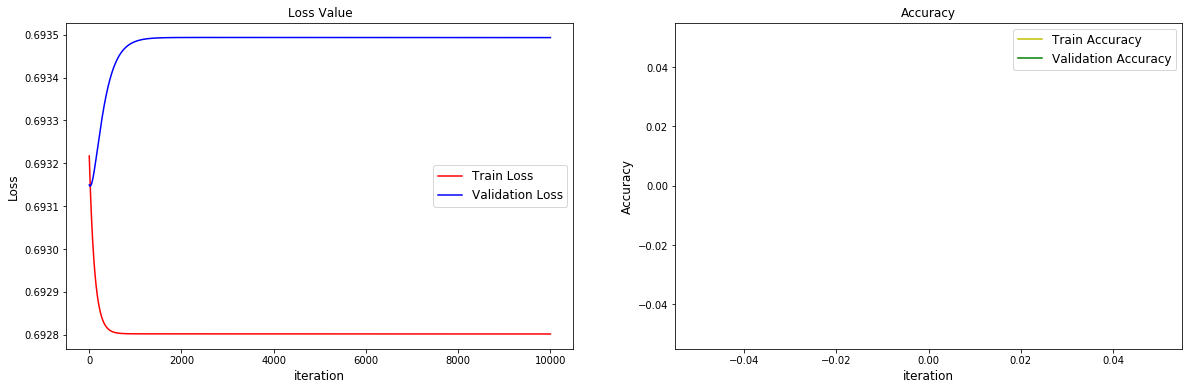

In [8]:
# PLOT TRAIN AND VALIDATION LOSS AT EVERY ITERATION
fig, ax2 = plt.subplots(1,2,figsize=(20,6))
ax2[0].set_title("Loss Value")
ax2[0].set_ylabel("Loss", fontsize="12")
ax2[0].set_xlabel("iteration", fontsize="12")
ax2[0].plot(train_loss[0], train_loss[1],'-r', label='Train Loss')
ax2[0].plot(val_loss[0], val_loss[1], '-b', label='Validation Loss')
ax2[0].legend(fontsize="12")

# PLOT TRAIN AND VALIDATION ACCURACY AT EVERY ITERATION
ax2[1].set_title("Accuracy")
ax2[1].set_ylabel("Accuracy", fontsize="12")
ax2[1].set_xlabel("iteration", fontsize="12")
ax2[1].plot(train_accuracy[0], train_accuracy[1], '-y', label='Train Accuracy')
ax2[1].plot(val_accuracy[0], val_accuracy[1], '-g', label='Validation Accuracy')
ax2[1].legend(fontsize="12")
plt.show()